# VaR lets you say something like this:

"With 95% confidence, my portfolio’s loss will not exceed $750 in one day"

In [15]:
pip install norm

Note: you may need to restart the kernel to use updated packages.


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import norm
import yfinance as yf
from scipy import stats

We'll simulate a portfolio of stocks. To do this, we need to define the symbols, the weights, and the investment amount.

We also define the confidence level which we’ll use later.

In [17]:
# create your portfolio of stocks
tickers = ["AAPL", "Meta", "C", "DIS"]

# pick the weights of each stock (must add to 1)
weights = np.array([0.25, 0.3, 0.15, 0.3])

# the size of the portfolio
portfolio_value = 1_000

# the confidence interval (95%)
confidence = 0.05

In [18]:
data = yf.download(tickers, start = "2018-01-01", end = "2021-12-31")["Close"]


[*********************100%***********************]  4 of 4 completed


# Compute portfolio statistics

In [19]:
# compute daily returns of each stock
returns = data.pct_change()

# compute the daily mean returns of each stock
mean_returns = returns.mean()

# compute portfolio mean return
port_mean = mean_returns.dot(weights)

# mean of investment returns
investment_mean = (1 + port_mean) * portfolio_value

# compute the portfolio covariance matrix
cov_matrix = returns.cov()

# compute portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# standard deviation of investment returns
investment_stdev = portfolio_value * port_stdev

First, we get the daily returns of the stocks in the portfolio. From there we get the mean return for all the data. We apply the weights to those returns and multiply them by the portfolio value to get the portfolio mean return.

Then we compute the covariance between the returns, take the square root of the covariance-adjusted weights of the stocks in the portfolio, and compute the portfolio standard deviation.

The portfolio mean and standard deviation are used in the next step.

# VaR
To find the VaR of this portfolio, we start by finding the point on the density plot based on the confidence level, mean, and standard deviation.

In [20]:
# ppf takes a percentage and returns a standard deviation 
# multiplier for what value that percentage occurs at.
# It is equivalent to a one-tail test on the density plot.
percent_point = stats.norm.ppf(confidence, investment_mean, investment_stdev)

VaR is the portfolio value less this amount.

In [21]:
# calculate the VaR at the confidence interval
value_at_risk = portfolio_value - percent_point

# print it out
f"Portfolio VaR: {value_at_risk}"

'Portfolio VaR: 28.257799417772162'

# Bonus: Scaling VaR to different time frames
What about over one week? Or one month?

Stock returns increase with the square root of time. Therefore to scale the value at risk, we multiply it by the square root of time. This sounds scary but it’s simple in Python.

Multiply the one-day VaR by the square root of one (day) through the square root of 30 (days).

In [22]:
value_at_risks = value_at_risk * np.sqrt(range(1, 31))

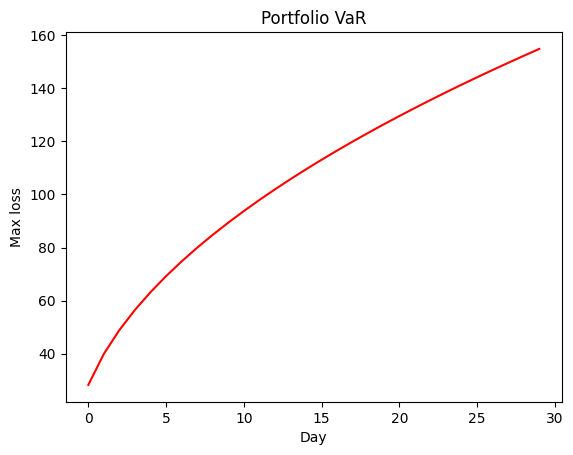

In [23]:
# build plot of VaR over time
plt.xlabel("Day")
plt.ylabel("Max loss")
plt.title("Portfolio VaR")
plt.plot(value_at_risks, "r")